In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data Collection/main_df_no_NAN_99p.csv").drop(columns="Unnamed: 0")

In [3]:
# To calculate returns, a standardized df is needed,
# where each ISIN has the same number of years next
# to it.
years = list(range(2000, 2023))
isin = df['ISIN'].unique()
combinations = list(itertools.product(isin, years))
df_combinations = pd.DataFrame(combinations, columns=['ISIN', 'Year'])

df_stand = pd.merge(df_combinations, df, on=['ISIN', 'Year'], how='left')

In [4]:
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159758 entries, 0 to 159757
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ISIN                        159758 non-null  object 
 1   Year                        159758 non-null  int64  
 2   Total Return                50736 non-null   float64
 3   ESG Score                   50736 non-null   float64
 4   ESG Combined Score          50736 non-null   float64
 5   ESG Controversies Score     50736 non-null   float64
 6   Social Pillar Score         50736 non-null   float64
 7   Governance Pillar Score     50736 non-null   float64
 8   Environmental Pillar Score  50736 non-null   float64
 9   Revenue - Mean              50736 non-null   float64
 10  Earnings Per Share - Mean   50736 non-null   float64
 11  Return On Equity - Mean     50736 non-null   float64
 12  Volume                      50736 non-null   float64
 13  Company Market

In [5]:
# Calculating one-period returns: (Xt/Xt-1) - 1
df_stand["ESG Score t-1"] = df_stand["ESG Score"].shift(+1)
df_stand["ESG Score Return"] = (df_stand["ESG Score"] / df_stand["ESG Score t-1"]) - 1

# Dropping the first year of every company, because it is compared to the last
# ESG Score of the previous company, not the previous year
df_stand = df_stand[df_stand["Year"] != 2000]

# Deleting NAN values
df_stand_cleaned = df_stand.dropna()

In [6]:
df_stand_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41524 entries, 3 to 159745
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ISIN                        41524 non-null  object 
 1   Year                        41524 non-null  int64  
 2   Total Return                41524 non-null  float64
 3   ESG Score                   41524 non-null  float64
 4   ESG Combined Score          41524 non-null  float64
 5   ESG Controversies Score     41524 non-null  float64
 6   Social Pillar Score         41524 non-null  float64
 7   Governance Pillar Score     41524 non-null  float64
 8   Environmental Pillar Score  41524 non-null  float64
 9   Revenue - Mean              41524 non-null  float64
 10  Earnings Per Share - Mean   41524 non-null  float64
 11  Return On Equity - Mean     41524 non-null  float64
 12  Volume                      41524 non-null  float64
 13  Company Market Cap          41

In [7]:
df_stand_cleaned.describe()

,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Revenue - Mean,Earnings Per Share - Mean,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean,ESG Score t-1,ESG Score Return
count,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000,41524.000000,4.152400e+04,41524.000000,41524.000000,4.152400e+04,4.152400e+04,4.152400e+04,41524.000000,41524.000000
mean,2015.184592,12.824179,47.241541,45.907243,91.777379,47.476777,52.343211,40.887064,3.306279e+11,85.907225,13.907919,1.049460e+06,3.274465e+11,4.572598e+10,44.471296,0.104488
std,4.764113,38.692666,19.269361,18.461604,20.874477,22.743455,21.280970,27.684505,1.529202e+12,640.263689,18.076916,4.306513e+06,1.561141e+12,2.295163e+11,19.391943,0.312906
min,2003.000000,-76.345128,4.470837,4.470837,3.846154,1.611402,3.956835,0.000000,0.000000e+00,-92.500500,-129.960000,0.000000e+00,8.885204e+07,-5.121924e+08,4.470837,-0.882713
25%,2012.000000,-11.242867,31.895176,31.513167,100.000000,29.417963,35.552761,16.614950,1.488170e+09,0.436995,6.759500,0.000000e+00,2.723323e+09,3.116338e+08,28.731038,-0.034717
50%,2016.000000,8.990963,47.411178,45.922586,100.000000,46.898020,53.252548,41.364184,6.113282e+09,1.733925,12.054540,1.515600e+04,1.039681e+10,1.154309e+09,43.788852,0.040886
75%,2019.000000,31.308672,62.478226,60.038724,100.000000,65.596752,69.700360,64.196737,4.001133e+10,5.650200,19.366287,3.801420e+05,6.645431e+10,7.470053e+09,59.585568,0.163683
max,2022.000000,255.555556,89.677802,87.456829,100.000000,95.077388,94.704109,95.529762,2.757546e+13,15015.239500,181.764550,6.600124e+07,3.384412e+13,4.625232e+12,89.614428,8.917483


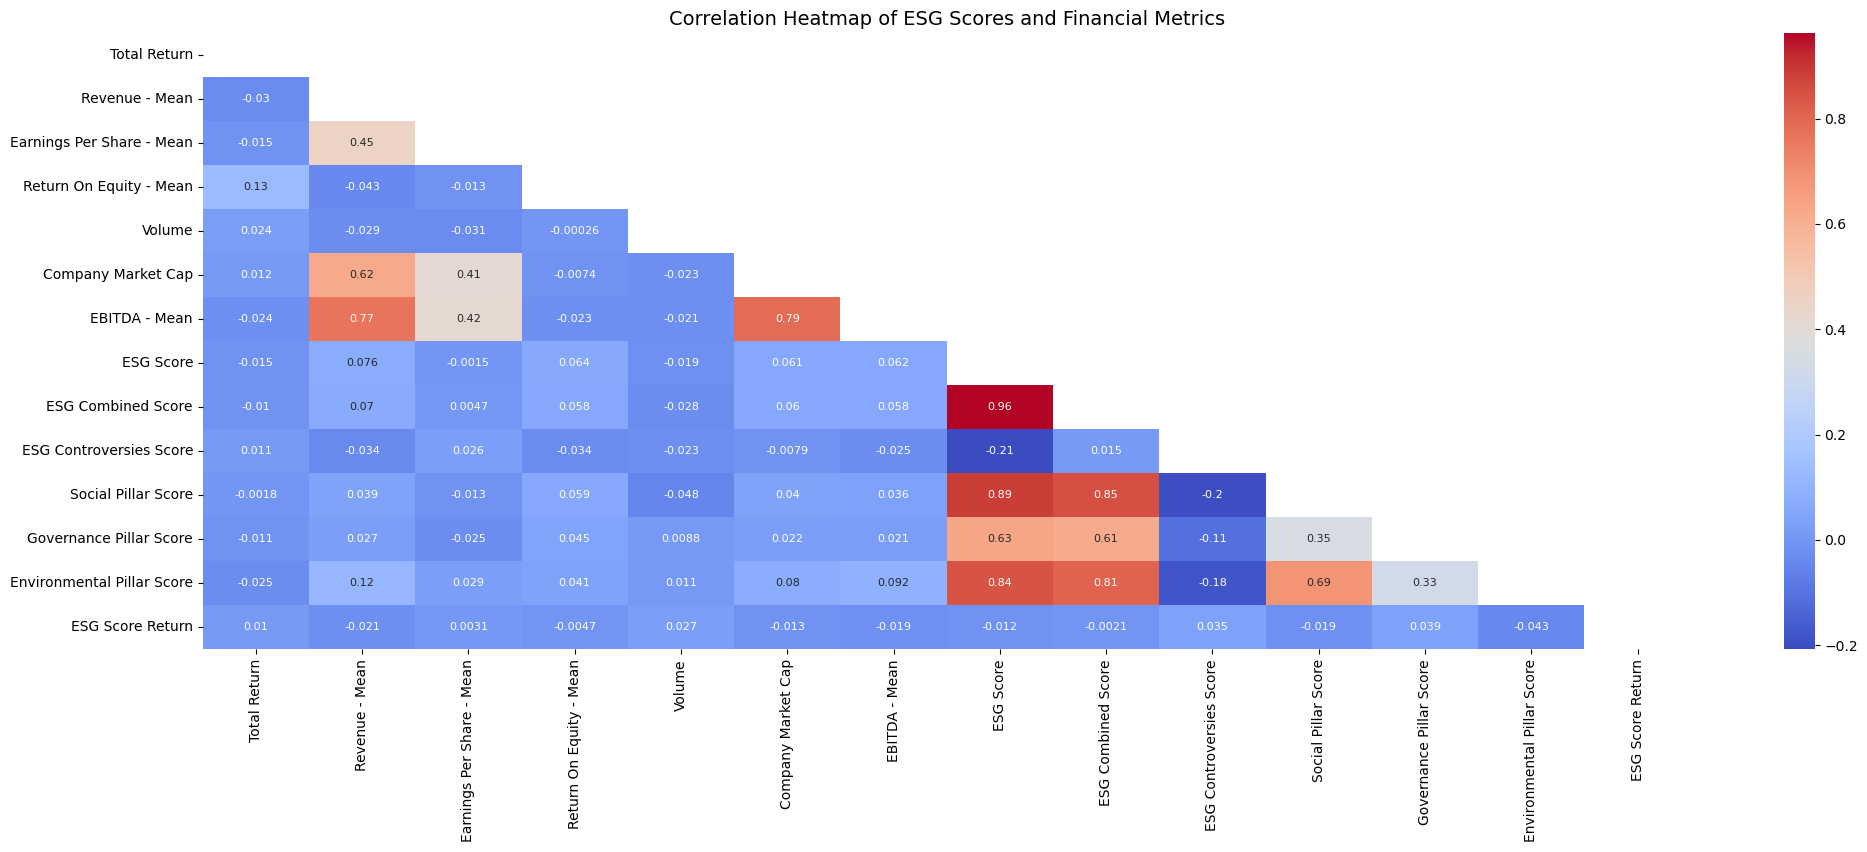

In [8]:
# Correlation heatmap of 'ESG scores' and 'financial metrics'
financial_cols = ['Total Return', 'Revenue - Mean', 'Earnings Per Share - Mean', 
                  'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean']
esg_cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 
            'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score', 'ESG Score Return']
cols = financial_cols + esg_cols
corr = df_stand_cleaned[cols].corr()

fig, ax = plt.subplots(figsize=(24, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Heatmap of ESG Scores and Financial Metrics', fontsize=14)
plt.show()

In [9]:
# filter dataframe for values below 25th percentile
q25_df = df_stand_cleaned[df_stand_cleaned['ESG Score Return'] < df_stand_cleaned['ESG Score Return'].quantile(0.25)]

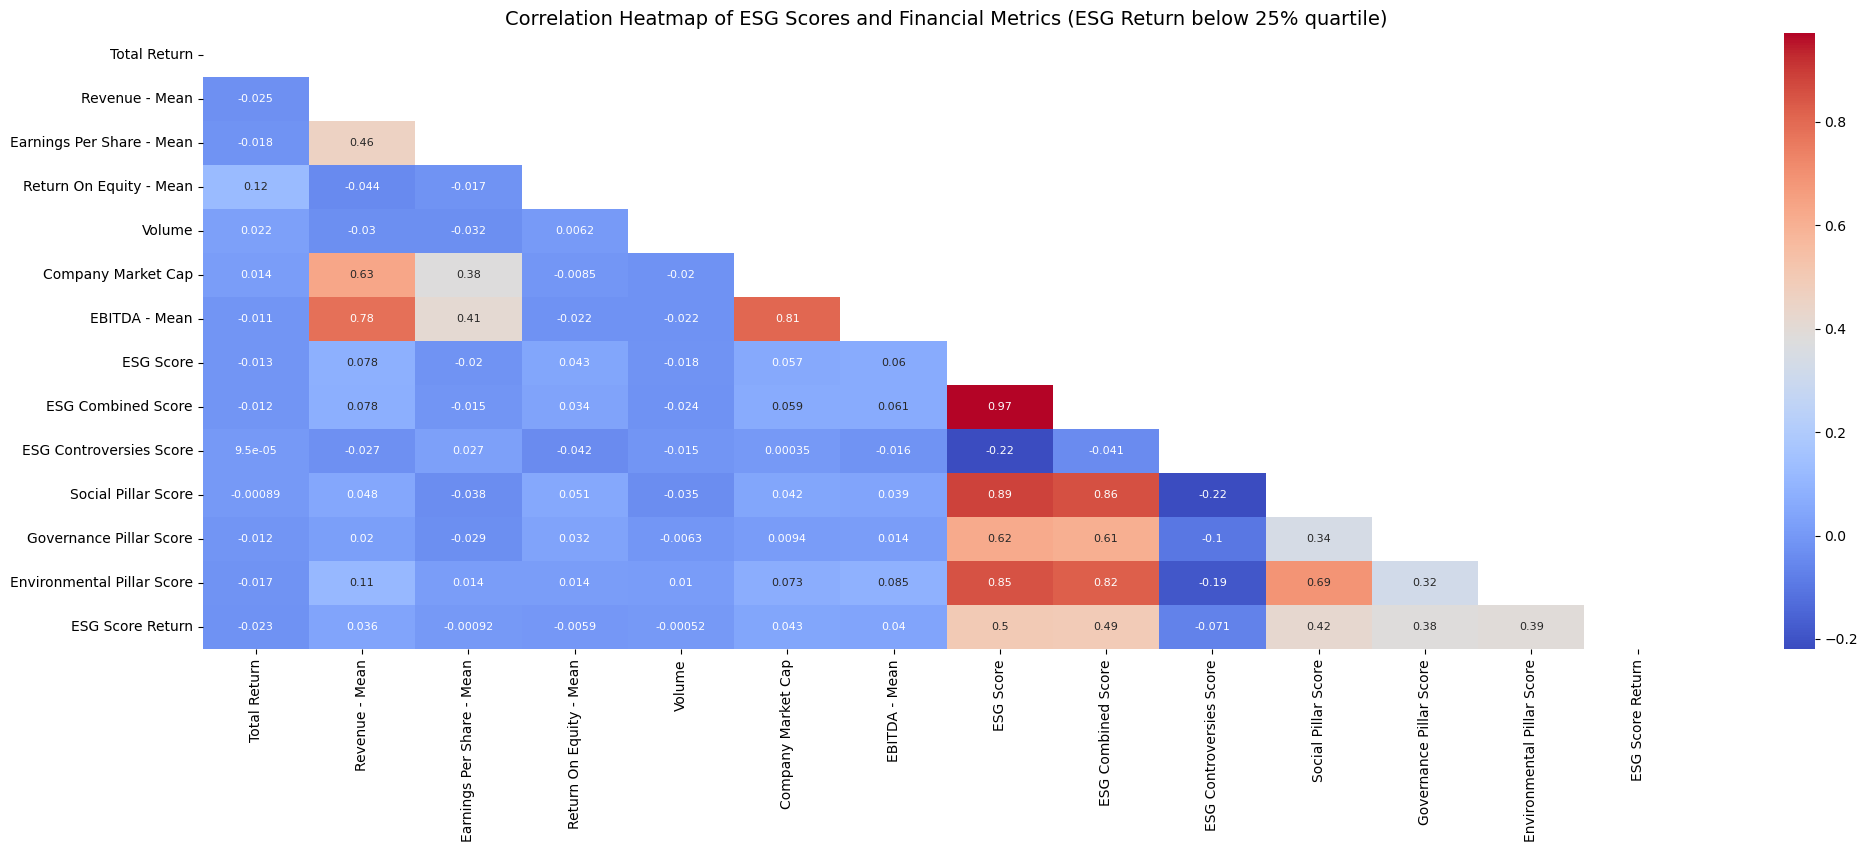

In [10]:
# Correlation heatmap of 'ESG scores' and 'financial metrics'
financial_cols = ['Total Return', 'Revenue - Mean', 'Earnings Per Share - Mean', 
                  'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean']
esg_cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 
            'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score', 'ESG Score Return']
cols = financial_cols + esg_cols
corr = q25_df[cols].corr()

fig, ax = plt.subplots(figsize=(24, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Heatmap of ESG Scores and Financial Metrics (ESG Return below 25% quartile)', fontsize=14)
plt.show()

In [11]:
# filter dataframe for values above 75th percentile
q75_df = df_stand_cleaned[df_stand_cleaned['ESG Score Return'] > df_stand_cleaned['ESG Score Return'].quantile(0.75)]

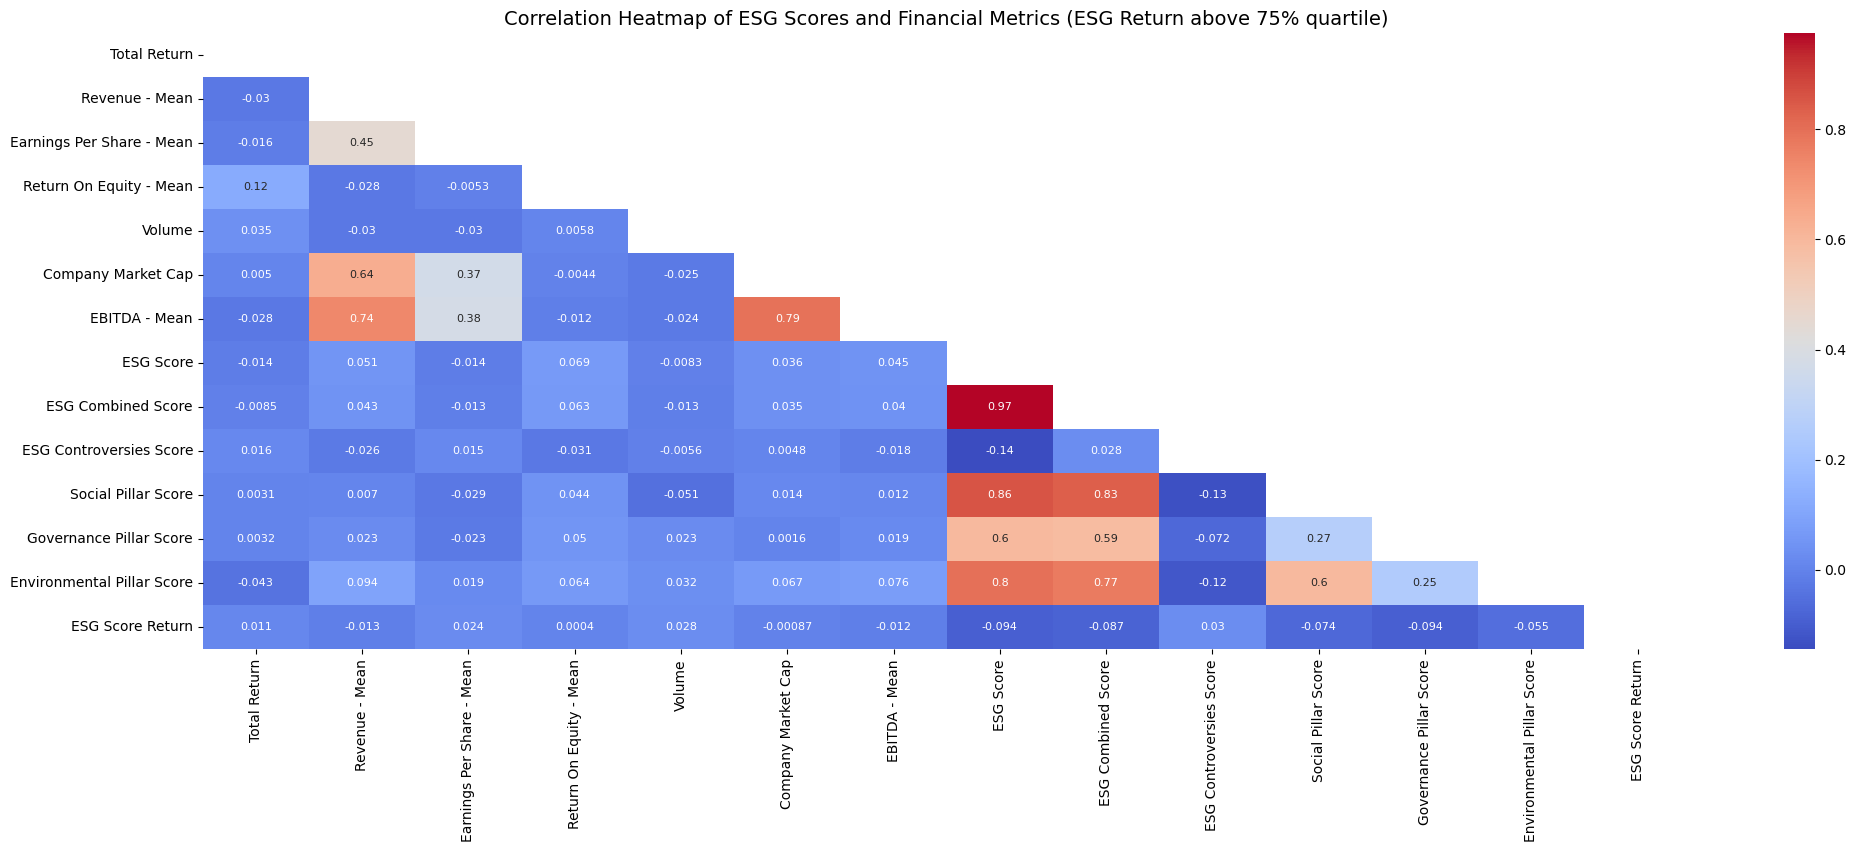

In [12]:
# Correlation heatmap of 'ESG scores' and 'financial metrics'
financial_cols = ['Total Return', 'Revenue - Mean', 'Earnings Per Share - Mean', 
                  'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean']
esg_cols = ['ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 
            'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score', 'ESG Score Return']
cols = financial_cols + esg_cols
corr = q75_df[cols].corr()

fig, ax = plt.subplots(figsize=(24, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', annot_kws={"fontsize":8})
plt.title('Correlation Heatmap of ESG Scores and Financial Metrics (ESG Return above 75% quartile)', fontsize=14)
plt.show()